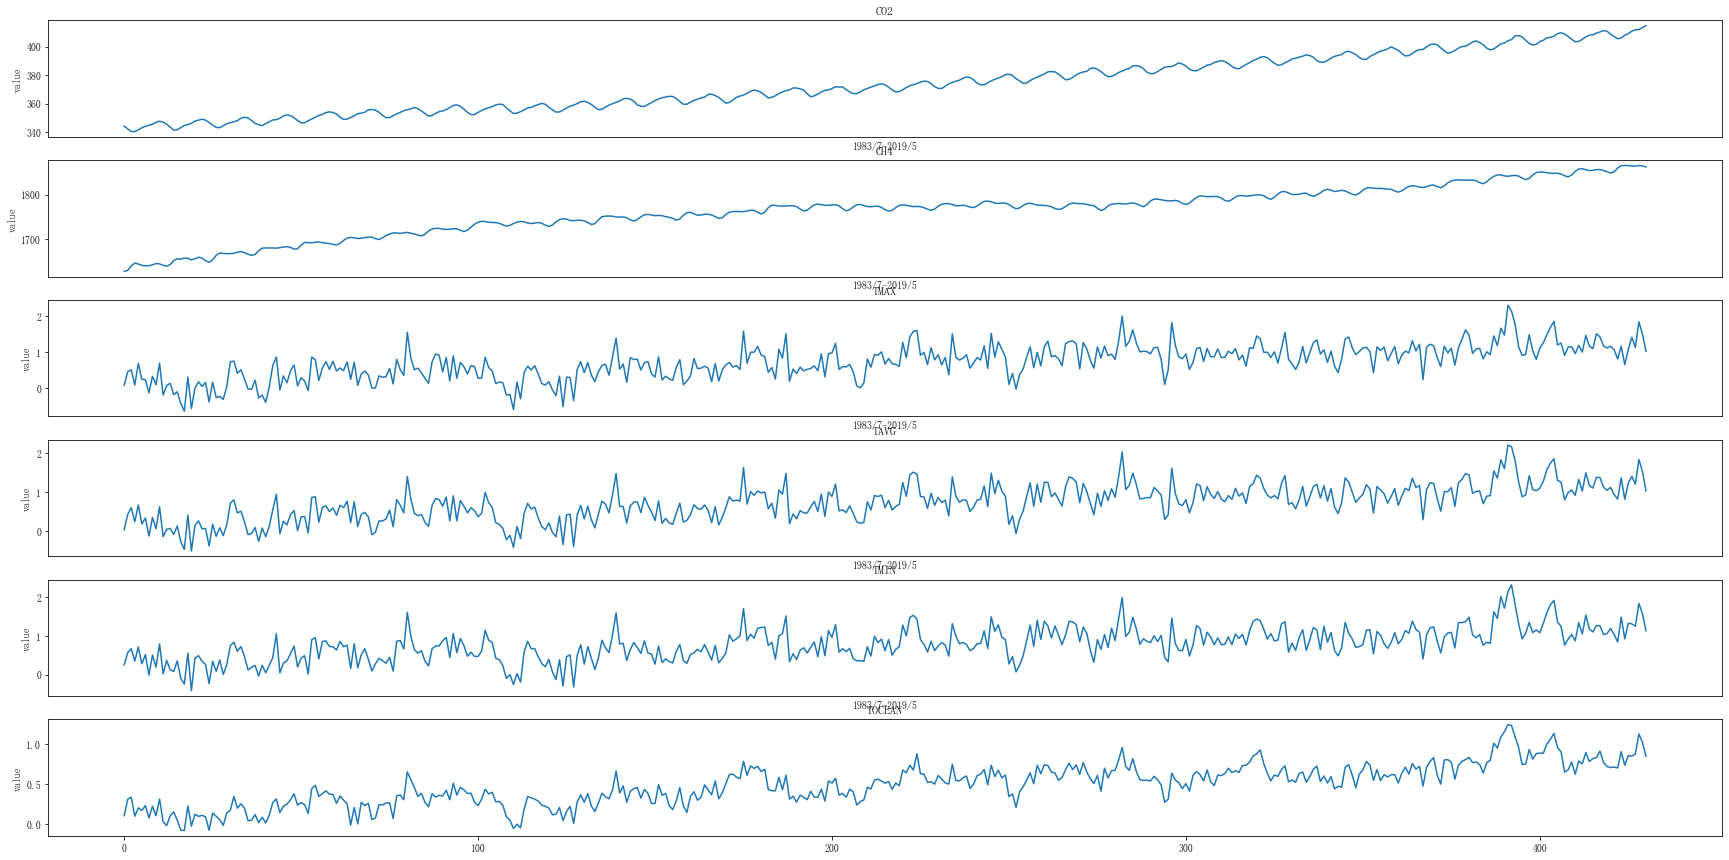

In [17]:
from pandas import read_csv
from matplotlib import pyplot
import datetime
import numpy as np
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline
# load dataset
dataset = read_csv('data.csv', header=0)
# print(dataset.values[:,0])

# month=dataset.values[:,0]
month=list(map(str,dataset.values[:,0]))
# print(month)
# print(type(month[0]))
values = dataset.values

# specify columns to plot
groups = list(range(1,len(dataset.columns)))
i = 1
# plot each column

start = datetime.datetime(1983, 7, 1)
end = datetime.datetime(2019, 5, 1)
# 设置日期的间隔为1
delta = datetime.timedelta(days=30.4)
 
# 生成一个matplotlib可以识别的日期对象
dates = mpl.dates.drange(start, end, delta)
# print(dates)

fig= pyplot.figure(figsize = (30,15))
for group in groups:
    
    plt.subplot(len(groups),1,i)
    i=i+1
    
    if i!=len(groups)+1:
        plt.xticks([])
        plt.xlabel("1983/7-2019/5")
#         pyplot.plot(month,values[:, group])
#     else:
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], loc='center')
    
#     pyplot.xlabel("time")
    pyplot.ylabel("value")
#     pyplot.xticks(rotation=90,fontsize=4)

pyplot.savefig("各类特征真实值.png",dpi=240)
#     pyplot.show()

In [2]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
 
# 转换序列成监督学习问题
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

def series_to_supervised(data, n_in=1, n_out=1,y_columns=[0],dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
#     print(n_vars)
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df[y_columns].shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in y_columns]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# 加载数据集
dataset = read_csv('data.csv', header=0)
values = dataset.values[:,1:]
feature=values.shape[1]

# print(values)
# # 整数编码
# encoder = LabelEncoder()
# values[:,4] = encoder.fit_transform(values[:,4])
# # ensure all data is float
# values = values.astype('float32')

# 归一化特征
scaler = MinMaxScaler(feature_range=(0, 1,2,3,4))
scaled = scaler.fit_transform(values)
# scaled=values

# 构建监督学习问题
n_in=72
reframed = series_to_supervised(scaled, n_in, 1,y_columns=list(range(feature)))
print(reframed.head(5))
# 分割为训练集和测试集
values = reframed.values

n_train_hours = 300
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# 分为输入输出
train_X, train_y = train[:, :-feature], train[:, -feature:]
print(-values.shape[1])
test_X, test_y = test[:, :-feature], test[:, -feature:]
# 重塑成3D形状 [样例, 时间步, 特征]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

Using TensorFlow backend.


    var1(t-72)  var2(t-72)  var3(t-72)  var4(t-72)  var5(t-72)  var6(t-72)  \
72    0.051675    0.000000    0.244801    0.200890    0.243947    0.140285   
73    0.025838    0.009155    0.372656    0.344329    0.359868    0.294824   
74    0.000000    0.052018    0.389703    0.408451    0.397285    0.314329   
75    0.000404    0.078236    0.248210    0.276130    0.280264    0.135034   
76    0.016687    0.069496    0.450733    0.433655    0.413426    0.213803   

    var1(t-71)  var2(t-71)  var3(t-71)  var4(t-71)  ...  var3(t-1)  var4(t-1)  \
72    0.025838    0.009155    0.372656    0.344329  ...   0.220252   0.175686   
73    0.000000    0.052018    0.389703    0.408451  ...   0.332424   0.284285   
74    0.000404    0.078236    0.248210    0.276130  ...   0.320491   0.283173   
75    0.016687    0.069496    0.450733    0.433655  ...   0.324923   0.302817   
76    0.036334    0.056596    0.300375    0.255374  ...   0.402318   0.385841   

    var5(t-1)  var6(t-1)   var1(t)   var2(t)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 300 samples, validate on 59 samples
Epoch 1/300
 - 3s - loss: 0.4532 - val_loss: 0.6423
Epoch 2/300
 - 0s - loss: 0.3590 - val_loss: 0.4228
Epoch 3/300
 - 0s - loss: 0.1608 - val_loss: 0.1151
Epoch 4/300
 - 0s - loss: 0.1705 - val_loss: 0.1206
Epoch 5/300
 - 0s - loss: 0.1003 - val_loss: 0.2820
Epoch 6/300
 - 0s - loss: 0.1331 - val_loss: 0.2915
Epoch 7/300
 - 0s - loss: 0.1137 - val_loss: 0.1967
Epoch 8/300
 - 0s - loss: 0.0982 - val_loss: 0.1418
Epoch 9/300
 - 0s - loss: 0.1052 - val_loss: 0.1639
Epoch 10/300
 - 0s - loss: 0.0928 - val_loss: 0.2113
Epoch 11/300
 - 0s - loss: 0.0963 - val_loss: 0.2030
Epoch 12/300
 - 0s - loss: 0.0908 - val_loss: 0.1604
Epoch 13/300
 - 0s - loss: 0.0871 - val_loss: 0.1579
Epoch 14/300
 - 0s - loss: 0.0833 - val_loss: 0.1643
Epoch 15/300
 - 0s - loss: 0.0820 - val_loss: 0.1438
Epoch 16/300
 - 0s - loss: 0.0779 - val_loss: 0.1

Epoch 144/300
 - 0s - loss: 0.0460 - val_loss: 0.0815
Epoch 145/300
 - 0s - loss: 0.0490 - val_loss: 0.0946
Epoch 146/300
 - 0s - loss: 0.0450 - val_loss: 0.0952
Epoch 147/300
 - 0s - loss: 0.0443 - val_loss: 0.0837
Epoch 148/300
 - 0s - loss: 0.0452 - val_loss: 0.0881
Epoch 149/300
 - 0s - loss: 0.0451 - val_loss: 0.1036
Epoch 150/300
 - 0s - loss: 0.0470 - val_loss: 0.0821
Epoch 151/300
 - 0s - loss: 0.0464 - val_loss: 0.0953
Epoch 152/300
 - 0s - loss: 0.0459 - val_loss: 0.0952
Epoch 153/300
 - 0s - loss: 0.0452 - val_loss: 0.0898
Epoch 154/300
 - 0s - loss: 0.0443 - val_loss: 0.0824
Epoch 155/300
 - 0s - loss: 0.0451 - val_loss: 0.0922
Epoch 156/300
 - 0s - loss: 0.0436 - val_loss: 0.0919
Epoch 157/300
 - 0s - loss: 0.0426 - val_loss: 0.0889
Epoch 158/300
 - 0s - loss: 0.0417 - val_loss: 0.1037
Epoch 159/300
 - 0s - loss: 0.0457 - val_loss: 0.1008
Epoch 160/300
 - 0s - loss: 0.0433 - val_loss: 0.0890
Epoch 161/300
 - 0s - loss: 0.0439 - val_loss: 0.0843
Epoch 162/300
 - 0s - loss: 

Epoch 296/300
 - 0s - loss: 0.0365 - val_loss: 0.0843
Epoch 297/300
 - 0s - loss: 0.0395 - val_loss: 0.1175
Epoch 298/300
 - 0s - loss: 0.0416 - val_loss: 0.1101
Epoch 299/300
 - 0s - loss: 0.0382 - val_loss: 0.0857
Epoch 300/300
 - 0s - loss: 0.0368 - val_loss: 0.1140


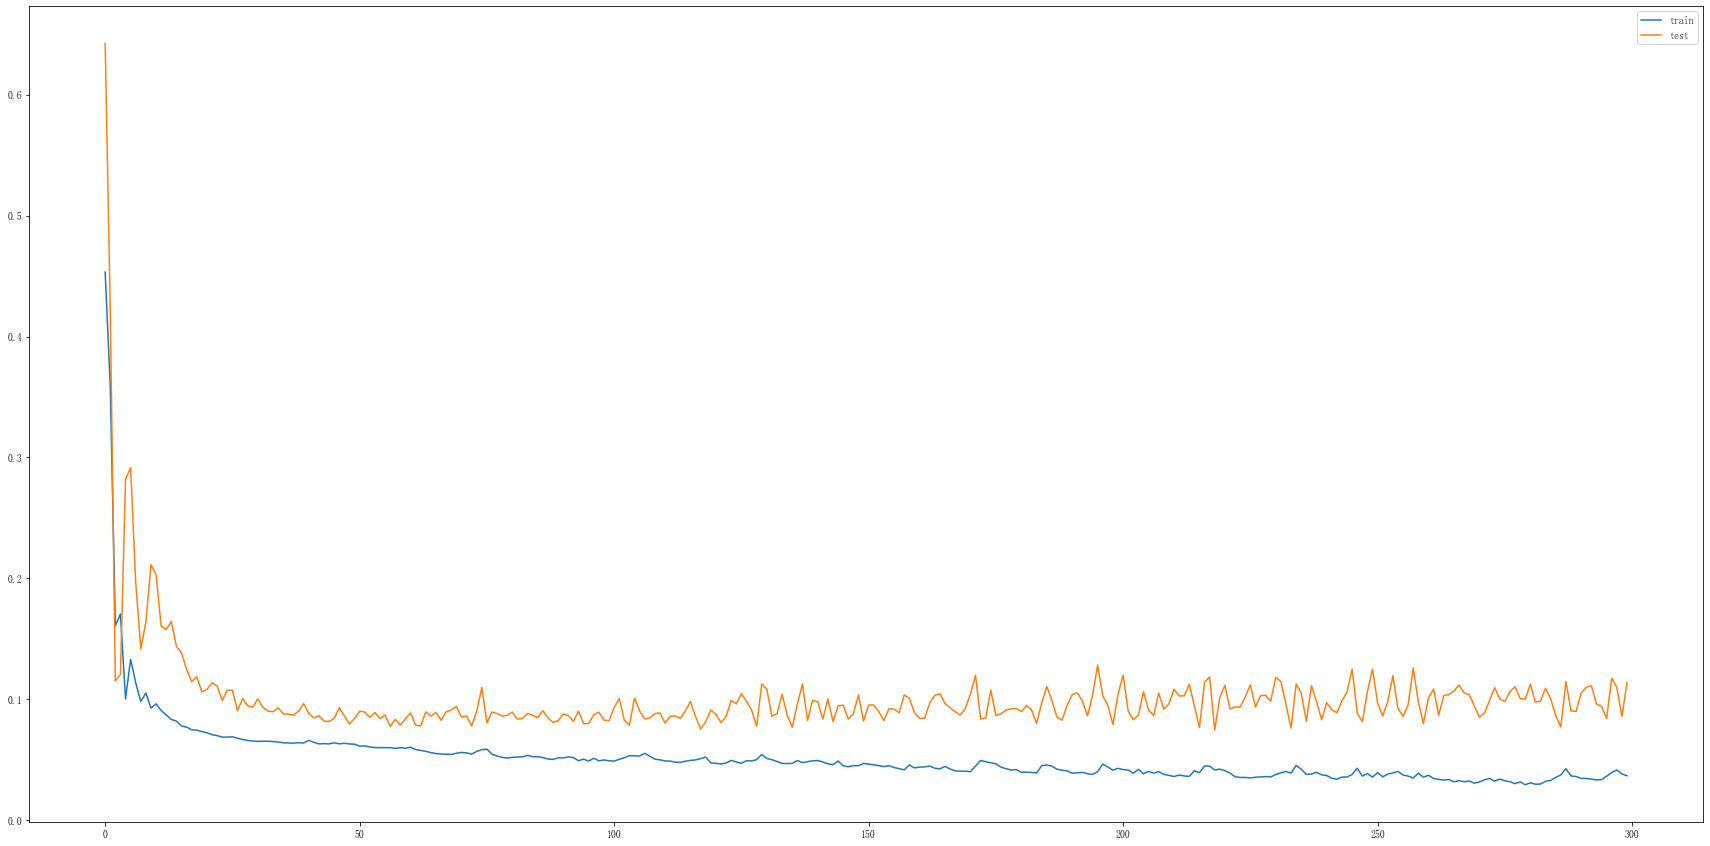

In [3]:
# 设计网络
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(200, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(LSTM(100,return_sequences=False))
model.add(Dense(100))
model.add(Dense(feature))
model.compile(loss='mae', optimizer='adam')
# 拟合神经网络模型
history = model.fit(train_X, train_y, epochs=300, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=True)

# 绘制训练测试误差图
fig= pyplot.figure(figsize = (30,15))
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
plt.savefig('训练误差图.png')
pyplot.show()


In [4]:
# 做出预测
yhat = model.predict(test_X)

test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# 反向转换预测值比例
# inv_yhat = concatenate((yhat, test_X1[:, 1:]), axis=1)

# inv_yhat = concatenate((yhat, test_X1[:, 2:]), axis=1)
inv_yhat=yhat
inv_yhat = scaler.inverse_transform(inv_yhat)
print(inv_yhat.shape)
# inv_yhat = inv_yhat[:,0]
# 反向转换实际值比例
test_y1 = test_y.reshape((len(test_y), len(groups)))
# inv_y = concatenate((test_y1, test_X1[:, 2:]), axis=1)
inv_y=test_y1
inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]


(59, 6)


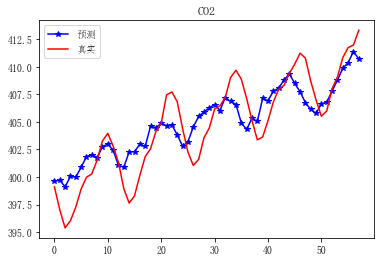

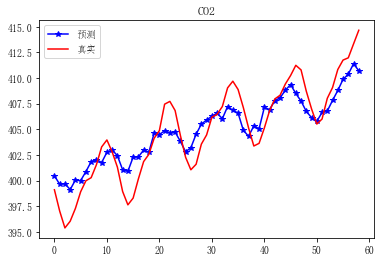

In [5]:
# 绘制历史数据和预测数据图
plt.plot(inv_yhat[1:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:-1,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


plt.plot(inv_yhat[:,0],label='预测',c='b',linestyle='-', marker='*')
plt.plot(inv_y[:,0],label="真实",c='r')
plt.legend()
plt.title('CO2')
plt.show()


Test RMSE: 1.937


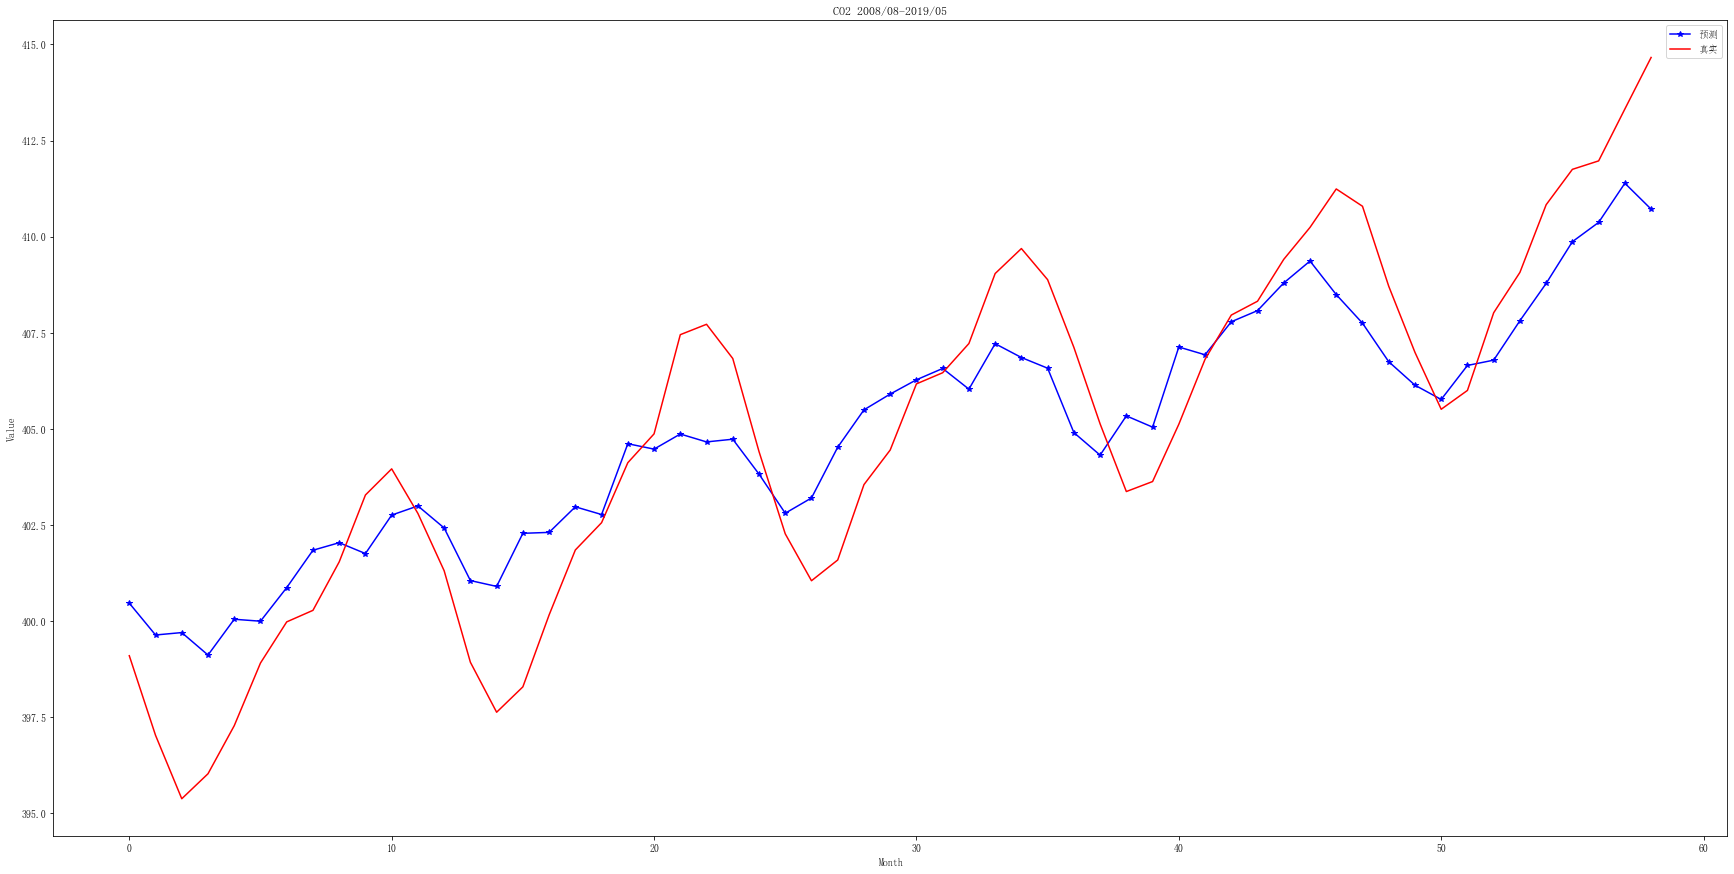

Test RMSE: 12.611


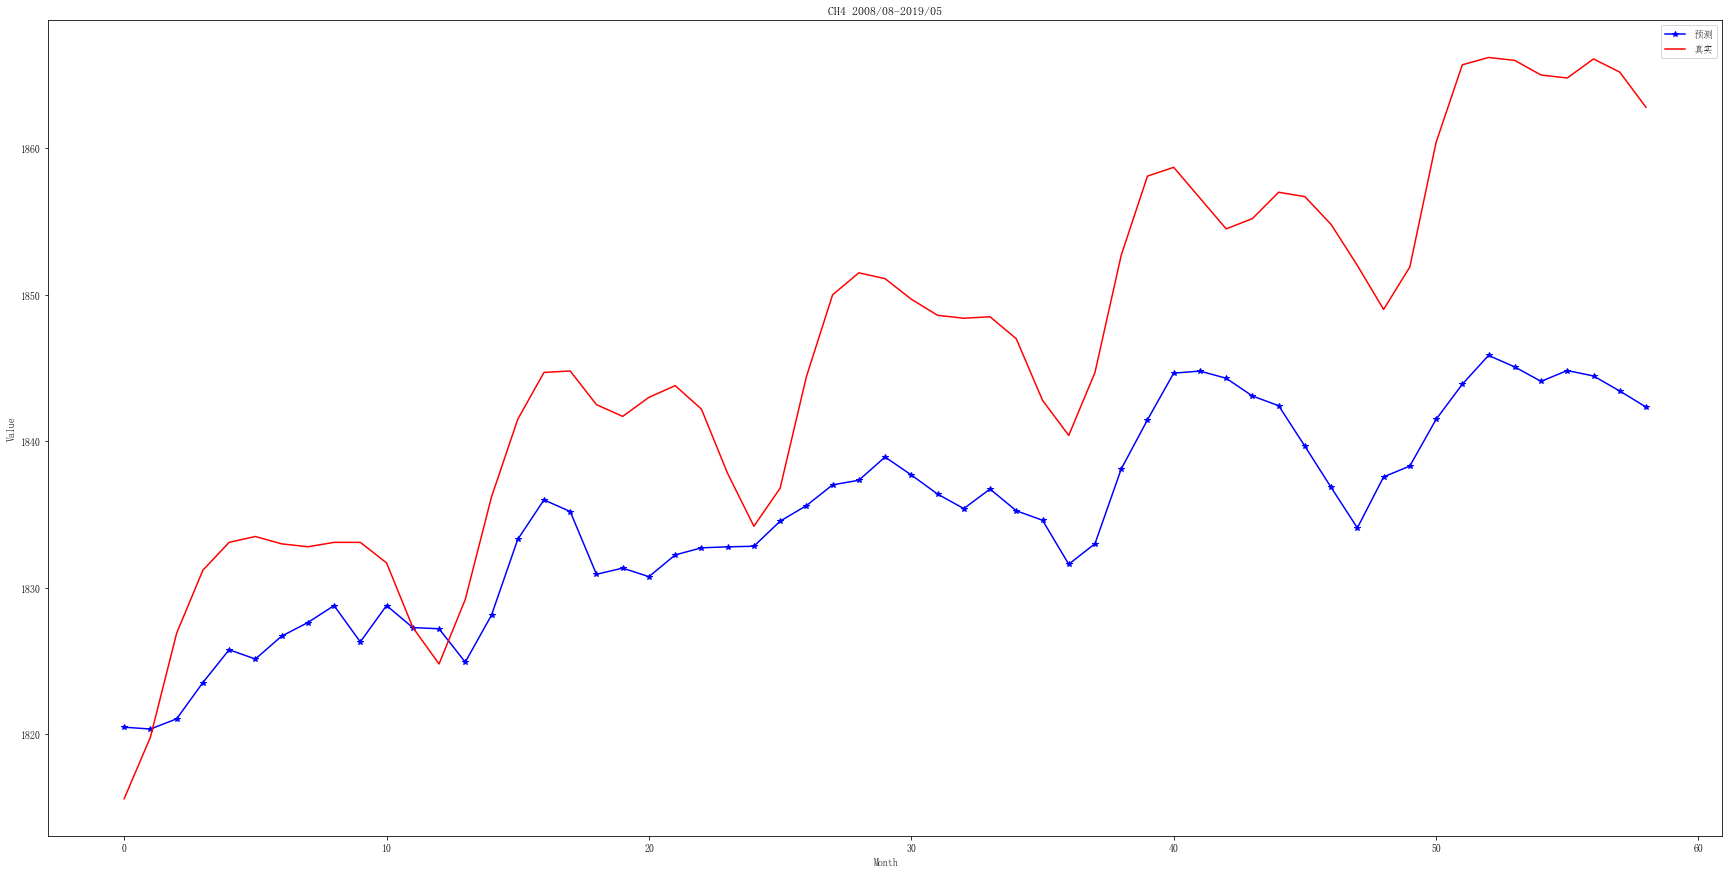

Test RMSE: 0.515


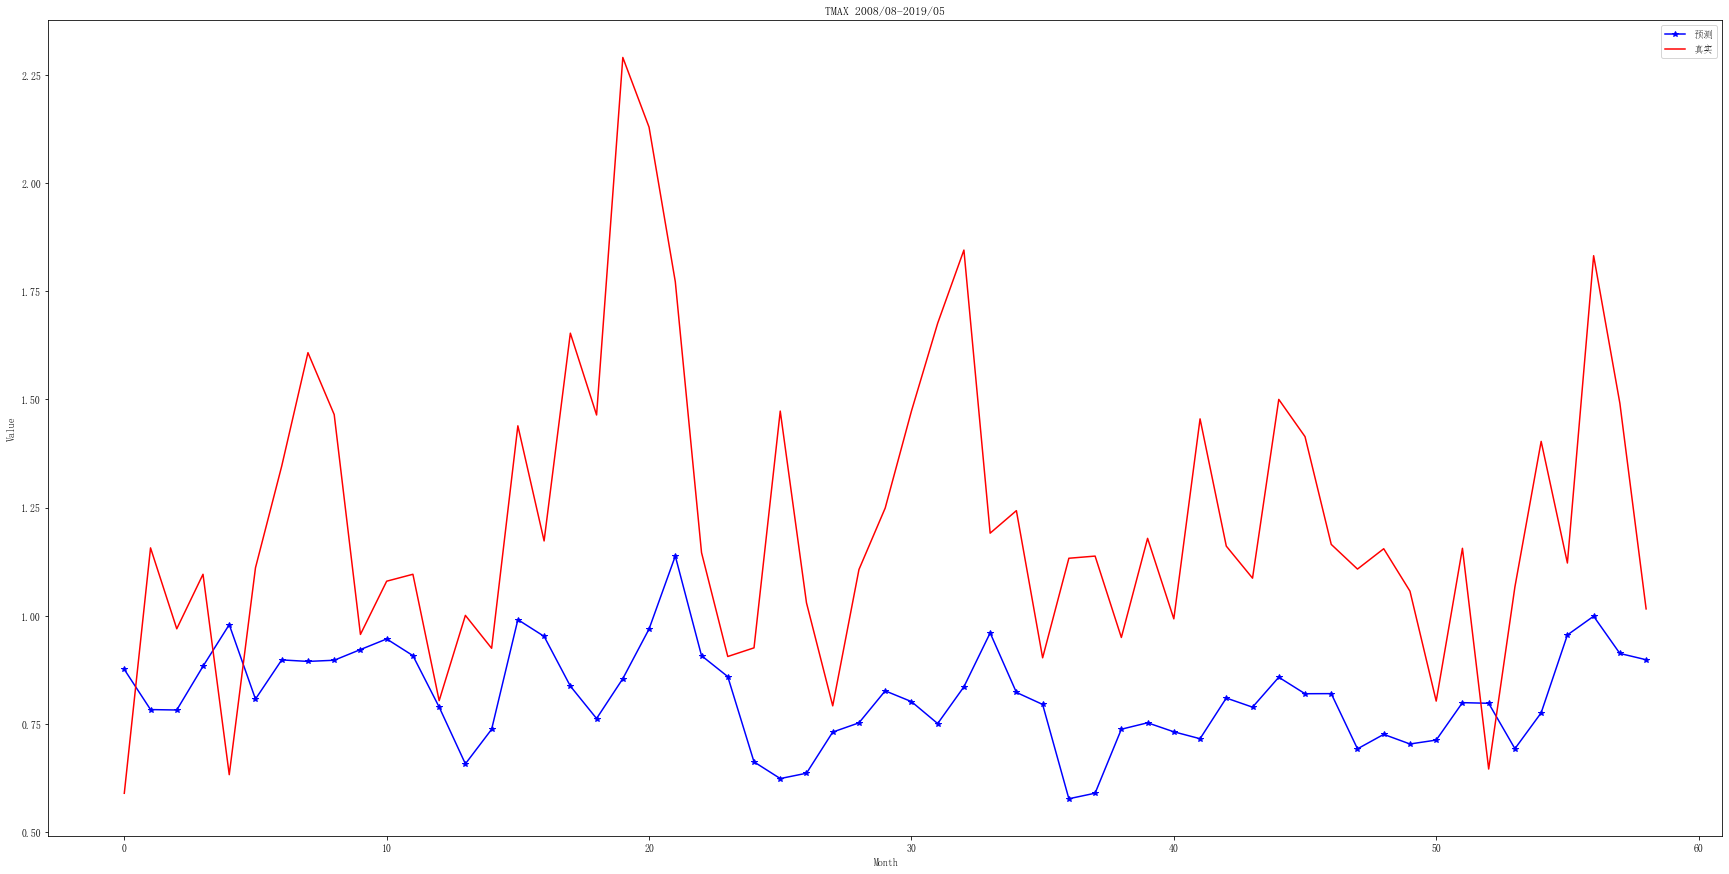

Test RMSE: 0.456


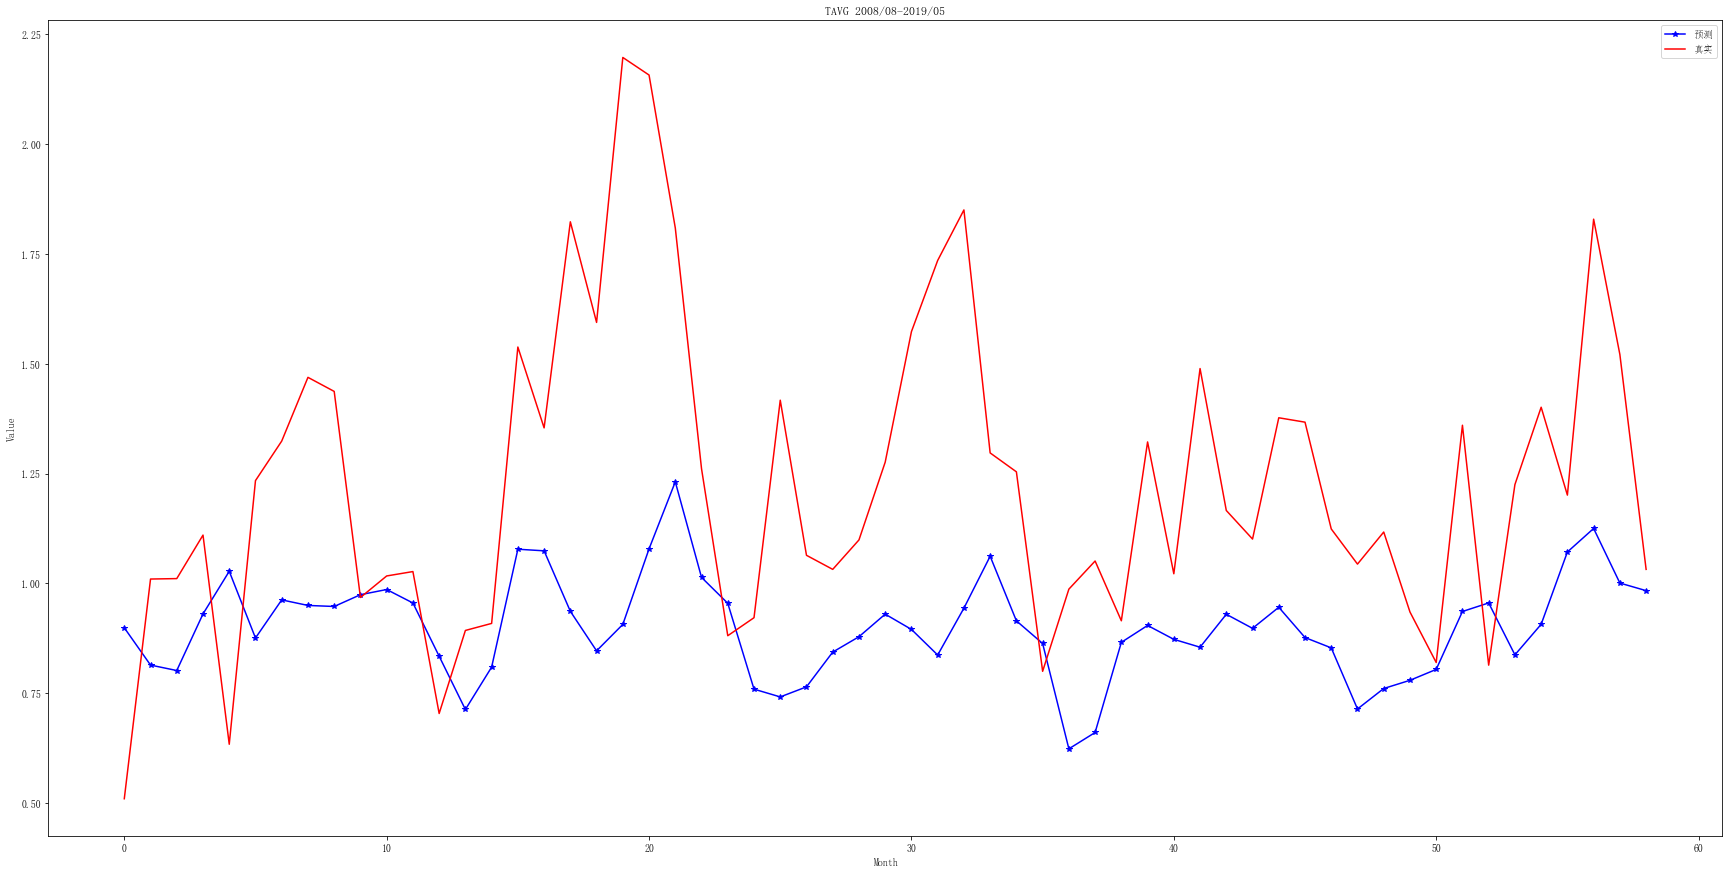

Test RMSE: 0.495


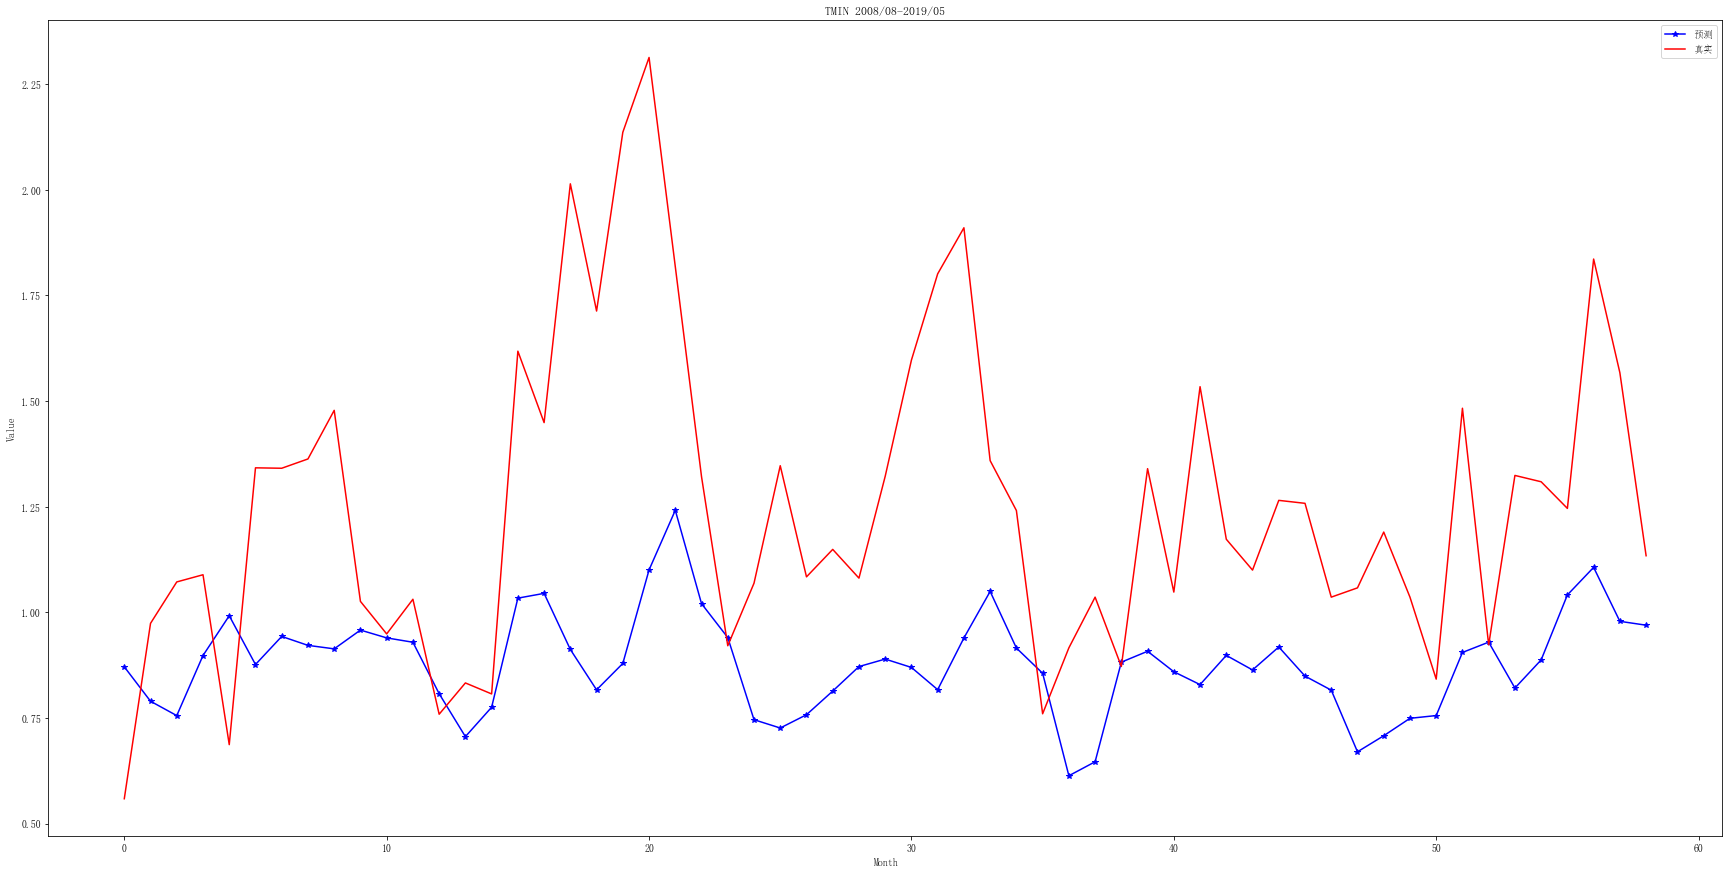

Test RMSE: 0.281


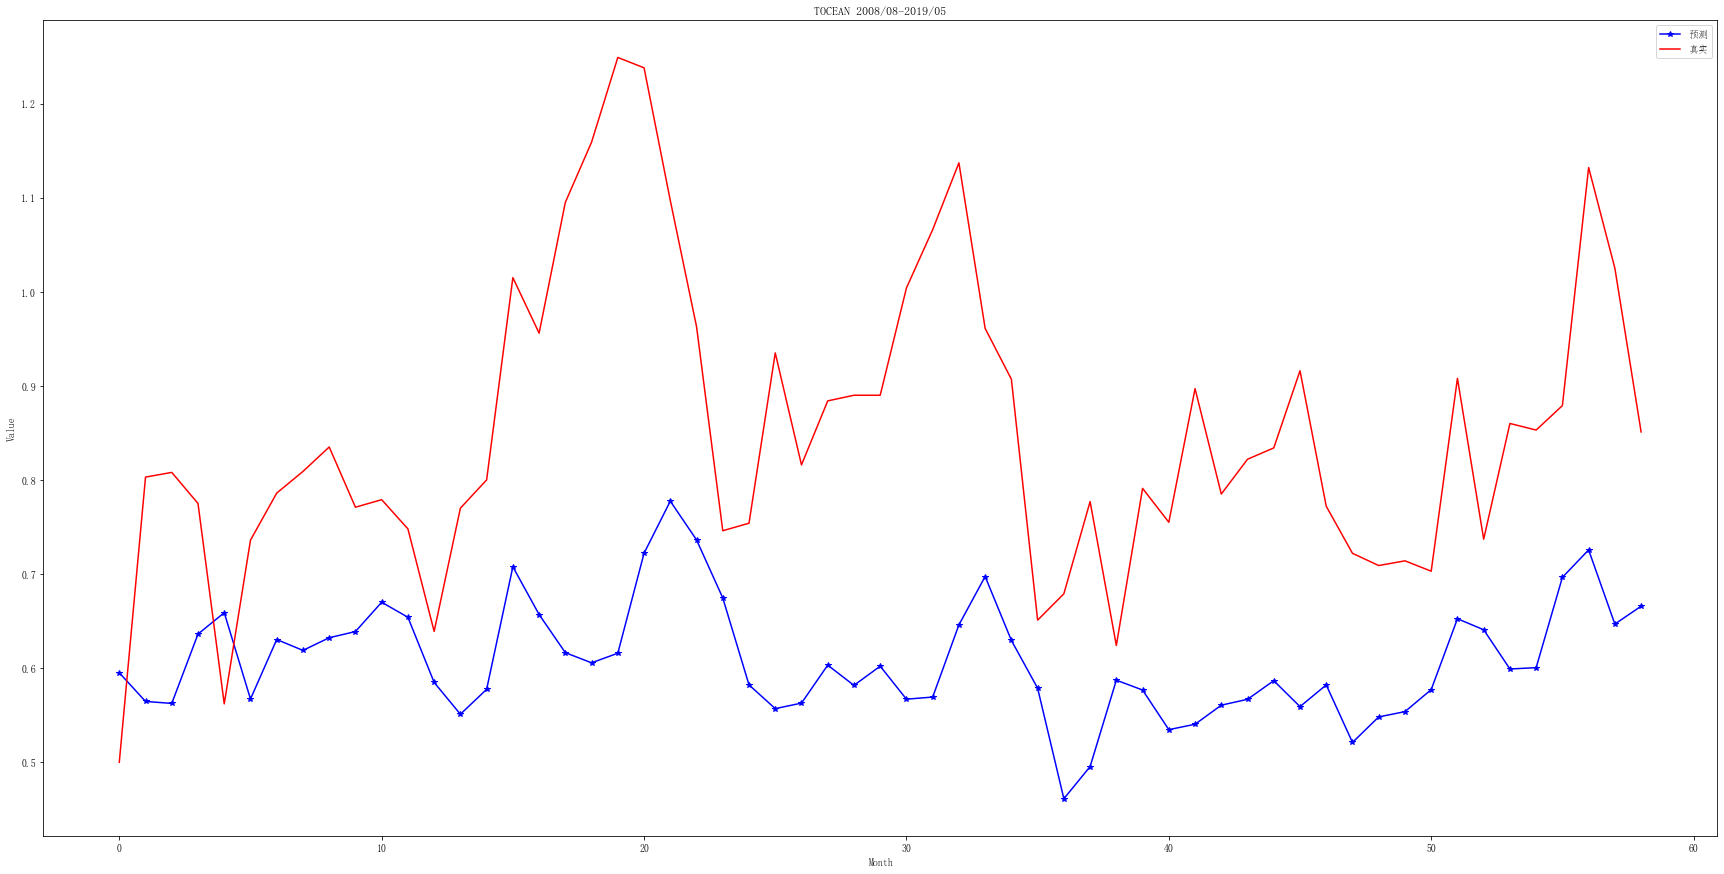

In [6]:
# 绘制历史数据和预测数据图
mpl.rcParams['font.sans-serif'] = ['FangSong']  # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
for i in groups:
    rmse = sqrt(mean_squared_error(inv_yhat[:,i-1], inv_y[:,i-1]))
    print('Test RMSE: %.3f' % rmse)

    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_yhat[:,i-1],label='预测',c='b',linestyle='-', marker='*')
    plt.plot(inv_y[:,i-1],label="真实",c='r')
    plt.legend()
    plt.title('{} 2008/08-2019/05'.format(dataset.columns[i]))
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.savefig('{}预测模型检验.png'.format(dataset.columns[i]))
    
    plt.show()
    # 计算RMSE





In [7]:
#预测未来25年
alltime=12*25
# test_25=test_X[-1:,:]
# print(test_25)

pred_x=test_y[-n_in:,:].reshape(1,1,n_in*feature)
print(pred_x.shape)
import copy

# print(pred_y[-1,:].shape)
pred_y=np.zeros((1,feature))
for i in range(alltime):
    tmp=model.predict(pred_x)
    pred_x[0,0,:-feature]=pred_x[0,0,feature:]
    pred_x[0,0,-feature:]=copy.deepcopy(tmp[0,:])
#     print(pred_y.shape,tmp.shape)
    pred_y=np.vstack((pred_y,copy.deepcopy(tmp)))
    
pred_y=pred_y[1:,:]
print(pred_y.shape)
print(pred_y)
    

#     pre=pre.reshape(1,1,(pre.shape[-1]))
#     pred_y=np.vstack((pred_y,pre))
    

ValueError: cannot reshape array of size 354 into shape (1,1,432)

In [ ]:


inv_pred_y = scaler.inverse_transform(pred_y)

for i in groups:
    # 绘制历史数据和预测数据图
    fig= pyplot.figure(figsize = (30,15))
    plt.plot(inv_pred_y[:,i-1],label='预测',c='b',linestyle='-', marker='*')
    plt.legend()
    plt.title('{} 2019/05-2044/05'.format(dataset.columns[i]))
    plt.xlabel("Month")
    plt.ylabel("Value")
    plt.savefig('{}未来25年预测.png'.format(dataset.columns[i]))
    plt.show()
    # 计算RMSE
